## C6b. Plot distribution of the water NDWI 025 mask over all frames in eopatches 

#### 0. Load required libraries, site dependant constants and utility functions.

In [2]:
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns

# EOLearn libraries:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, LoadTask, SaveTask, FeatureType, EOExecutor
from eolearn.core import OverwritePermission

# Add to python path parent dictionary (to have acces to the data and util catalogue)
import sys
sys.path.append("../../")

# load site dependant constants (HERE YOU CAN CHOOSE DIFFERENT LOCATION)
from aoi_sites import upe_promice_area as site

# load utility functions
from utils import io_functions as io_utils
from utils import plot_functions as plot_utils

#### 1. There are many water masks:

0. 'WATER_MASK_ST_010'
0. 'WATER_MASK_ST_015'
0. 'WATER_MASK_ST_020'
0. 'WATER_MASK_ST_025'
1. 'WATER_MASK_ST_030'

0. WATER_MASK_ICE_ST_010
0. WATER_MASK_ICE_ST_015
0. WATER_MASK_ICE_ST_020
0. WATER_MASK_ICE_ST_025
0. WATER_MASK_ICE_ST_030


but after a sanity check it was decited to go with 'WATER_MASK_ST_025'


#### 2. Define EOTask to calculate mask covarage:

In [12]:

class CountMaskCoverage(EOTask):
    
    def __init__(self, input_mask_name, output_scalar_name ):
        self.input_mask_name = input_mask_name
        self.output_scalar_name = output_scalar_name
        
    def execute(self, eopatch):
        ultimate_masks = eopatch.mask[self.input_mask_name]
        mask_shape = ultimate_masks.shape
        #print(mask_shape)
        coverage_list = []
        
        for i in range(mask_shape[0]):
            array = ultimate_masks[i].squeeze()
            #print(array.shape)
            coverage = np.sum(array.astype(np.uint8)) #/ np.prod(array.shape)
            coverage_list.append(coverage)
        
        
        eopatch.add_feature(FeatureType.SCALAR_TIMELESS, self.output_scalar_name, np.asarray(coverage_list))
        return eopatch

In [13]:
calculate_water_mask_coverage_ndwi_st_025 = CountMaskCoverage(input_mask_name='WATER_MASK_ST_025',
                                                            output_scalar_name='WATER_MASK_ST_025_COVERAGE')
calculate_water_mask_coverage_ndwi_st_010 = CountMaskCoverage(input_mask_name='WATER_MASK_ST_010',
                                                            output_scalar_name='WATER_MASK_ST_010_COVERAGE')
calculate_water_mask_coverage_ndwi_ice_st_025 = CountMaskCoverage(input_mask_name='WATER_MASK_ICE_ST_025',
                                                            output_scalar_name='WATER_MASK_ICE_ST_025_COVERAGE')


#### 3. Test exemplary eo_patch

In [14]:
#eo_patch = io_utils.load_exemplary_eopatch(date_range = site.DATE_RANGES_LANDSAT_8[0], patch_id=6, random_choice=True)
#eo_patch

eo_patch = EOPatch.load('../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/3063_maxcc_0.05_x-4_y-134')

In [15]:
eo_patch = calculate_water_mask_coverage_ndwi_st_025.execute(eo_patch)
eo_patch = calculate_water_mask_coverage_ndwi_st_010.execute(eo_patch)
eo_patch = calculate_water_mask_coverage_ndwi_ice_st_025.execute(eo_patch)
eo_patch

EOPatch(
  data: {
    DATASET_CLD_200_dil_6_str2: numpy.ndarray(shape=(9, 333, 333, 11), dtype=float32)
    LANDSAT_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_GREEN_NIR: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_ICE: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_1: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_2: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    LANDSAT_QA_LAYERS: numpy.ndarray(shape=(9, 333, 333, 5), dtype=float32)
    LANDSAT_RAW_BANDS: numpy.ndarray(shape=(9, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(9, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS_DAY_0: numpy.ndarray(shape

In [16]:
eo_patch.scalar_timeless['WATER_MASK_ST_025_COVERAGE']

array([   2,    2,  148,    0,    0,    3,   50, 1482,    1], dtype=uint32)

In [17]:
eo_patch.scalar_timeless['WATER_MASK_ST_010_COVERAGE']

array([  176,   357,   276,     0,     0,  2149,  9794, 11789,   944],
      dtype=uint32)

In [18]:
eo_patch.scalar_timeless['WATER_MASK_ICE_ST_025_COVERAGE']

array([   0,    0,   76,    0,    0,    2,  161, 3468,    0], dtype=uint32)

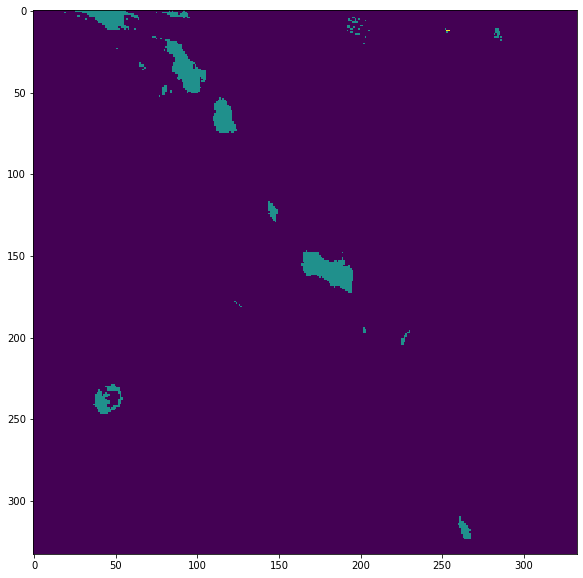

In [19]:
plot_utils.plot_timeless_mask_LANDSAT_8_max_min_val(band_idx=0, eopatch=eo_patch, mask_acces_name='WATER_MASK_ST_025_COUNT')

2013-09-21 15:32:38
Ploting...


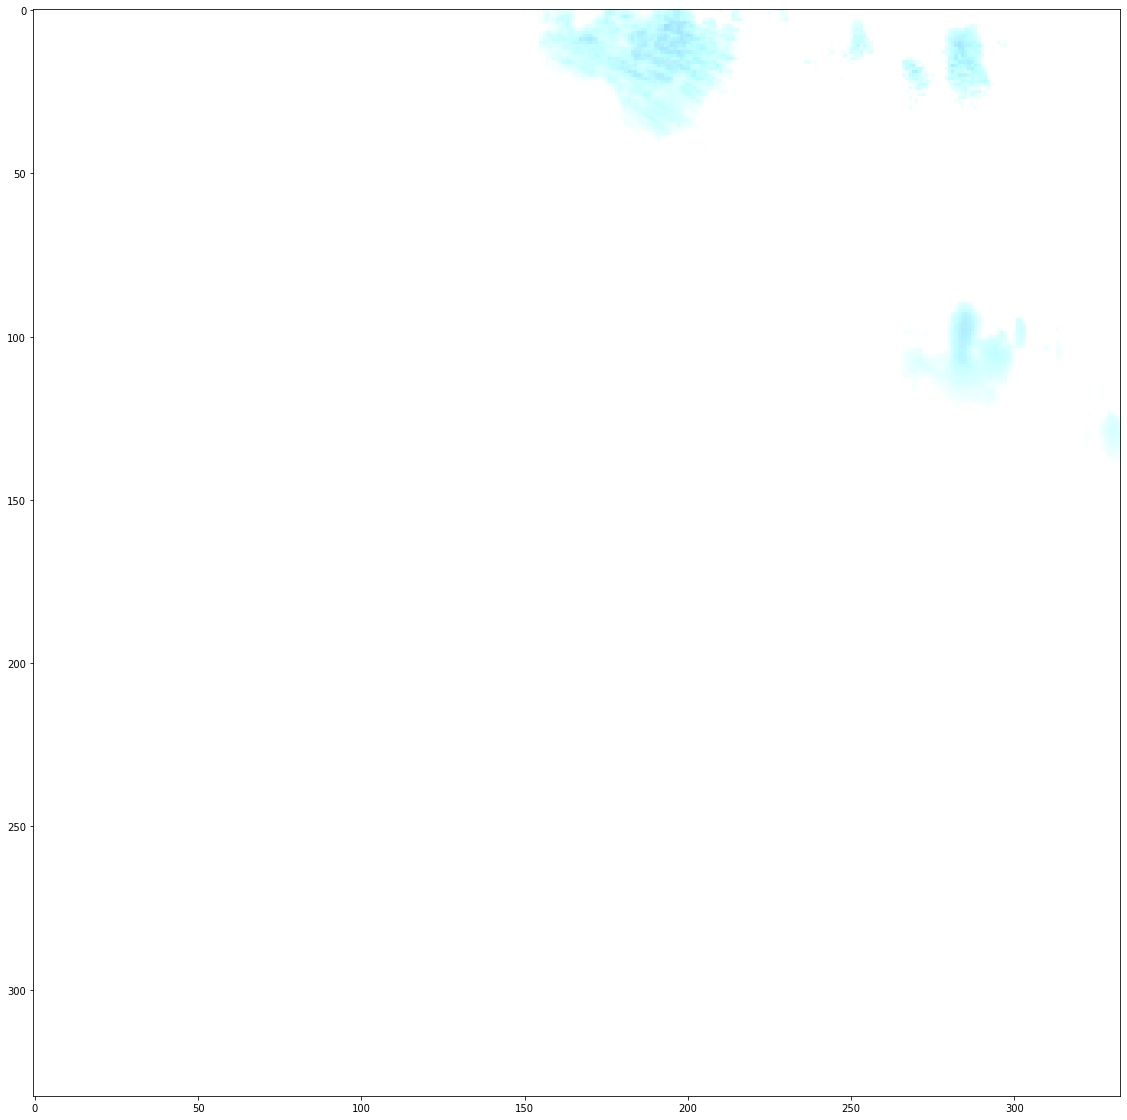

In [20]:
plot_utils.plot_RGB_LANDSAT_8_image(eo_patch, datetime_idx=6)

2013-09-28 15:38:22
Ploting...


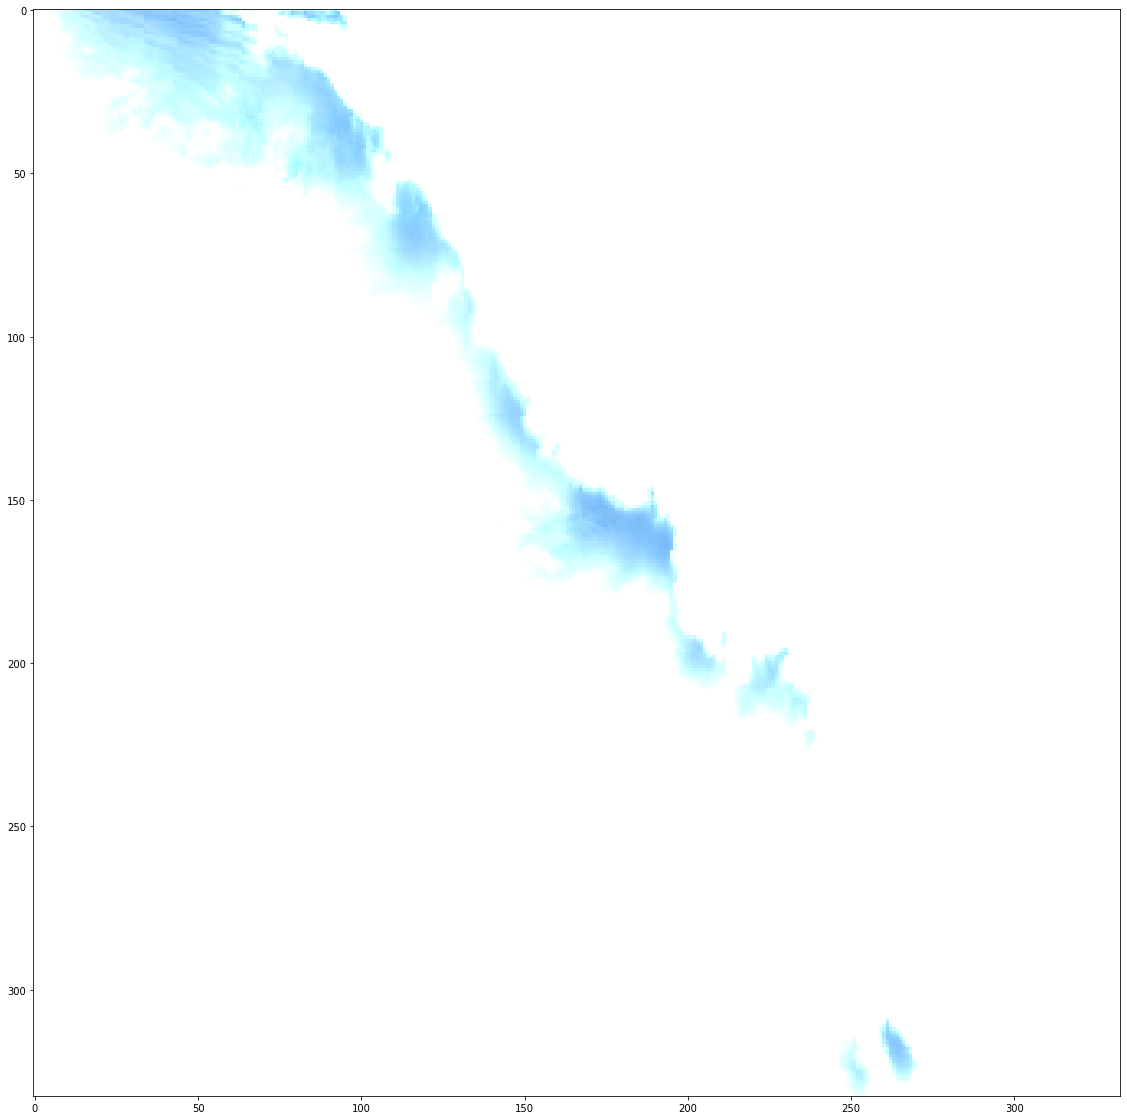

In [119]:
# check the random eopatch
plot_utils.plot_RGB_LANDSAT_8_image(eo_patch, datetime_idx=7)

2013-09-28 15:38:22


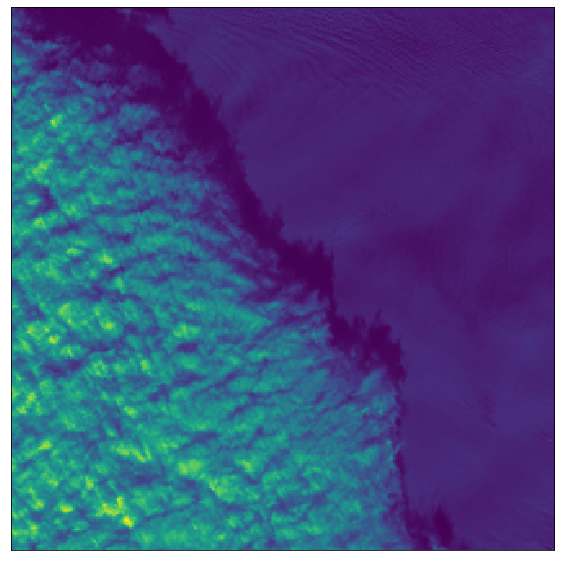

In [21]:
plot_utils.plot_single_band_LANDSAT_8(eopatch=eo_patch, band_idx= 5, data_acces_name='LANDSAT_RAW_BANDS' , datetime_idx=7 )

#### Takeout:

better to have 150 becasue in this case it detected the clouds, which were not detected in the other mask:


2013-09-28 15:38:22


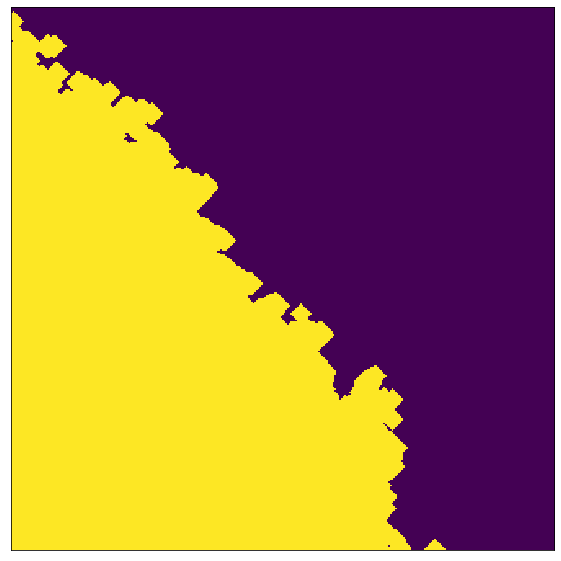

In [22]:
plot_utils.plot_single_mask_LANDSAT_8(eopatch=eo_patch, band_idx=0, data_acces_name='CLOUD_MASK_SWIR-1_150_dil_6_str1', datetime_idx=7)

2013-09-28 15:38:22


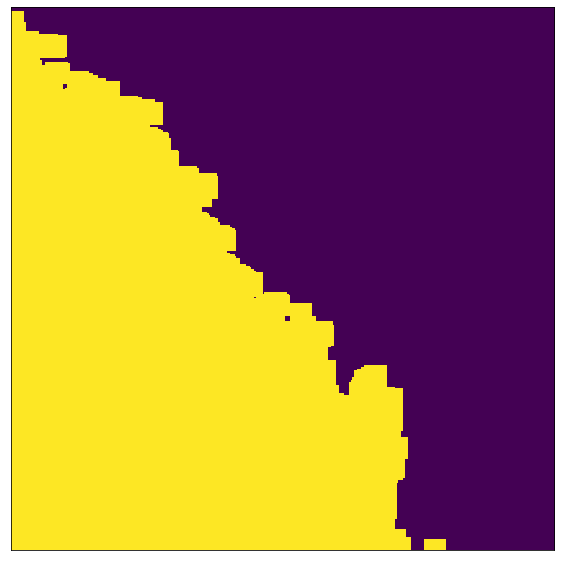

In [23]:
plot_utils.plot_single_mask_LANDSAT_8(eopatch=eo_patch, band_idx=0, data_acces_name='CLOUD_MASK_SWIR-1_150_dil_6_str2', datetime_idx=7)

2013-09-28 15:38:22


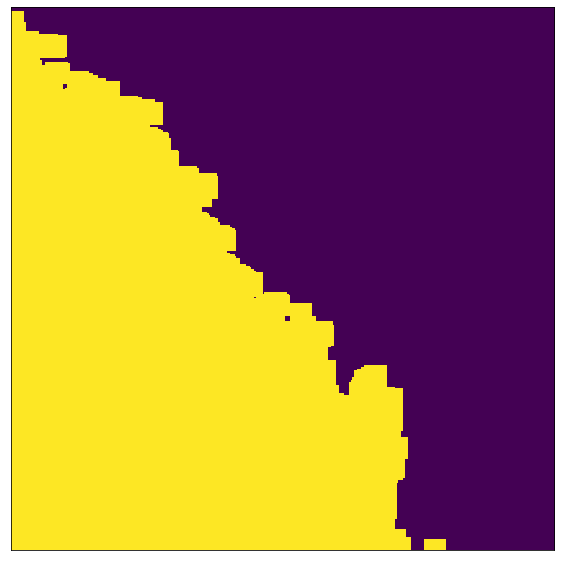

In [24]:
plot_utils.plot_single_mask_LANDSAT_8(eopatch=eo_patch, band_idx=0, data_acces_name='CLOUD_MASK_SWIR-1_150_dil_6_str2', datetime_idx=7)

#### 4. Perform task on all patches

In [25]:

for date_range_landsat in site.DATE_RANGES_LANDSAT_8 :
    print('Reading EOPatches from:', date_range_landsat )
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_landsat)
    # TASK TO LOAD AND SAVE EXISTING EOPATCHES HAS TO BE CREATED YEARLY (different directories)
    load_eotask = LoadTask(eopatches_filepath)
    save_eotask = SaveTask(eopatches_filepath, overwrite_permission=OverwritePermission.OVERWRITE_PATCH, compress_level=1)
    
    # Define the workflow
    workflow = LinearWorkflow(
    load_eotask,
    calculate_water_mask_coverage_ndwi_st_025,
    calculate_water_mask_coverage_ndwi_st_010,
    calculate_water_mask_coverage_ndwi_ice_st_025,
    save_eotask
    )
                      
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    execution_args = []
    for eopatch_name in list_of_available_patches:
        execution_args.append({
        load_eotask: {'eopatch_folder': eopatch_name},
        save_eotask: {'eopatch_folder': eopatch_name}
        })
    
    #print(execution_args)                            
    executor = EOExecutor(workflow, execution_args, save_logs=True)
    executor.run(workers=1, multiprocess=False)

    executor.make_report()

Reading EOPatches from: ('2013-05-01', '2013-10-31')


C:\Users\Kamil\Anaconda3\lib\site-packages\jinja2\utils.py:485: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
C:\Users\Kamil\Anaconda3\lib\site-packages\holoviews\core\data\grid.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import OrderedDict, defaultdict, Iterable
C:\Users\Kamil\Anaconda3\lib\site-packages\holoviews\operation\datashader.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Callable, Iterable
C:\Users\Kamil\Anaconda3\lib\site-packages\numba\npyufunc\dufunc.py:86: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargs

Reading EOPatches from: ('2014-05-01', '2014-10-31')



Reading EOPatches from: ('2015-05-01', '2015-10-31')



Reading EOPatches from: ('2016-05-01', '2016-10-31')



Reading EOPatches from: ('2017-05-01', '2017-10-31')



Reading EOPatches from: ('2018-05-01', '2018-10-31')



Reading EOPatches from: ('2019-05-01', '2019-10-31')


#### 4. Get all ultimate invalid data mask

In [26]:
all_mask_coverage_ndwi_st_010 = []
all_mask_coverage_ndwi_st_025 = []
all_mask_coverage_ndwi_ine_st_025 = []
error_count = 0
for date_range_landsat in site.DATE_RANGES_LANDSAT_8 :
    print('Reading EOPatches from:', date_range_landsat )
    eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], date_range_landsat)
    list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
    for eo_patch_file_name in list_of_available_patches:
        filepath = eopatches_filepath+eo_patch_file_name
        print(filepath)
        eo_patch = EOPatch.load(filepath)
        try:
            all_mask_coverage_ndwi_st_010.append(eo_patch.scalar_timeless['WATER_MASK_ST_010_COVERAGE'])
            all_mask_coverage_ndwi_st_025.append(eo_patch.scalar_timeless['WATER_MASK_ST_025_COVERAGE'])
            all_mask_coverage_ndwi_ice_st_025.append(eo_patch.scalar_timeless['WATER_MASK_ICE_ST_025_COVERAGE'])
        except Exception as e:
            error_count += 1
            print(repr(e))
            continue
print('Just {0} values are missing due to a  KeyError:'.format(error_count) )

Reading EOPatches from: ('2013-05-01', '2013-10-31')
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2969_maxcc_0.05_x-3_y-130
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2970_maxcc_0.05_x-3_y-131
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2971_maxcc_0.05_x-3_y-132
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2972_maxcc_0.05_x-3_y-133
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2973_maxcc_0.05_x-3_y-134
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2974_maxcc_0.05_x-3_y-135
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2975_maxcc_0.05_x-3_y-136
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2976_maxcc_0.05_x-3_y-137
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2977_maxcc_0.05_x-3_y-138
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/2978_maxcc_0.05_x-3_y-139
../../data/EOPatc

../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/2976_maxcc_0.05_x-3_y-137
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/2977_maxcc_0.05_x-3_y-138
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/2978_maxcc_0.05_x-3_y-139
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/2979_maxcc_0.05_x-3_y-140
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/3059_maxcc_0.05_x-4_y-130
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/3060_maxcc_0.05_x-4_y-131
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/3061_maxcc_0.05_x-4_y-132
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/3062_maxcc_0.05_x-4_y-133
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/3063_maxcc_0.05_x-4_y-134
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/3064_maxcc_0.05_x-4_y-135
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2016_05-2016_10/306

../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3063_maxcc_0.05_x-4_y-134
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3064_maxcc_0.05_x-4_y-135
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3065_maxcc_0.05_x-4_y-136
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3066_maxcc_0.05_x-4_y-137
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3067_maxcc_0.05_x-4_y-138
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3068_maxcc_0.05_x-4_y-139
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3069_maxcc_0.05_x-4_y-140
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3172_maxcc_0.05_x-5_y-130
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3173_maxcc_0.05_x-5_y-131
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/3174_maxcc_0.05_x-5_y-132
../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/317

In [140]:
#print(len(all_mask_coverage_ndwi_st_010))
all_2013 = all_mask_coverage_ndwi_st_025[:55]
all_2014 = all_mask_coverage_ndwi_st_025[55:110]
all_2015 = all_mask_coverage_ndwi_st_025[110:165]
all_2016 = all_mask_coverage_ndwi_st_025[165:220]
all_2017 = all_mask_coverage_ndwi_st_025[220:275]
all_2018 = all_mask_coverage_ndwi_st_025[275:330]
all_2019 = all_mask_coverage_ndwi_st_025[330:]

by_year = [all_2013,all_2014,all_2015,all_2016,all_2017,all_2018,all_2019]
for i in by_year:
    counter = 0
    counter_bad = 0
    for j in i:
        #print(j)
        for h in j:
            if h >= 5 :
                counter = counter + 1
            else:
                counter_bad = counter_bad + 1
    #print('YEAR')
    print(counter)
    #print(counter_bad)
    #print(counter+counter_bad)

99
319
543
616
603
394
1164


In [132]:
by_year = [all_2013,all_2014,all_2015,all_2016,all_2017,all_2018,all_2019]
for i in by_year:
    #print(len(np.concatenate(i)))
    #print(np.sum(np.concatenate(i)))
    #print(np.median(np.concatenate(i)))
    #print(np.average(np.concatenate(i)))
    print(np.var(np.concatenate(i)))

7309764.228508332
18965779.11845934
49151784.2916415
47180849.07320933
80706364.68915099
34534859.88745187
31512361.54162166


In [28]:
all_ult_mask_coverage_ndwi_st_010_list = np.concatenate(all_mask_coverage_ndwi_st_010)
all_ult_mask_coverage_ndwi_st_025_list = np.concatenate(all_mask_coverage_ndwi_st_025)
all_ult_mask_coverage_ndwi_ice_st_025_list = np.concatenate(all_mask_coverage_ndwi_ine_st_025)

In [31]:
len(all_mask_coverage_ndwi_st_010)

385

In [33]:
385/7 # this is how many differen eopatches we have

55.0

In [30]:
len(all_ult_mask_coverage_ndwi_st_010_list) # how many different pictures we have in total

6844

In [32]:
6844/385 # so on average 18 per eopatch 

17.776623376623377

#### 3. Plot distribution of ultimatly masked area, other statistics and pickle it:

121076818
17690.943600233782
695.0


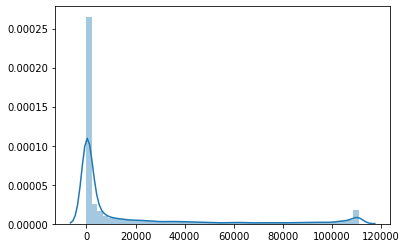

In [38]:
#shape = all_ult_mask_coverage_150_str1_list.squeeze()
sns.distplot( all_ult_mask_coverage_ndwi_st_010_list.squeeze() )
print(np.sum(all_ult_mask_coverage_ndwi_st_010_list))
print(np.average(all_ult_mask_coverage_ndwi_st_010_list.squeeze()))
print(np.median(all_ult_mask_coverage_ndwi_st_010_list.squeeze()))

13440879
1963.8923144360024
24.0
6519.908165922022


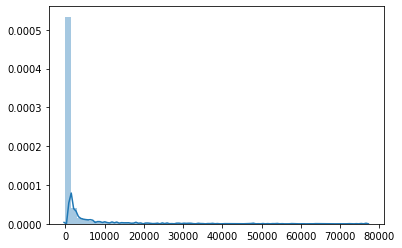

In [108]:
#shape = all_ult_mask_coverage_150_str1_list.squeeze()
sns.distplot( all_ult_mask_coverage_ndwi_st_025_list.squeeze() )
print(np.sum(all_ult_mask_coverage_ndwi_st_025_list))
print(np.average(all_ult_mask_coverage_ndwi_st_025_list.squeeze()))
print(np.median(all_ult_mask_coverage_ndwi_st_025_list.squeeze()))
print(np.std(all_ult_mask_coverage_ndwi_st_025_list.squeeze()))

In [50]:
all_ult_mask_coverage_ndwi_st_025_list_no_zeros = []

for i in all_ult_mask_coverage_ndwi_st_025_list.squeeze():
    if i == 0:
        continue
    else:
        all_ult_mask_coverage_ndwi_st_025_list_no_zeros.append(i)
len(all_ult_mask_coverage_ndwi_st_025_list_no_zeros)

3966

13440879
3389.0264750378215
611.5


C:\Users\Kamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


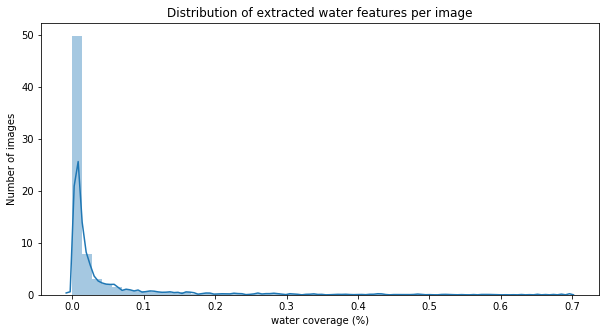

In [101]:
import matplotlib.pyplot as plt
#shape = all_ult_mask_coverage_150_str1_list.squeeze()
fig = plt.figure(figsize=(10, 5))
by_percent = [i/(333*333) for i in all_ult_mask_coverage_ndwi_st_025_list_no_zeros ]
#ax = sns.distplot( all_ult_mask_coverage_ndwi_st_025_list_no_zeros, bins=50)
ax = sns.distplot( by_percent, bins=50)
ax.set_title('Distribution of extracted water features per image')
ax.set_xlabel('water coverage (%)')
ax.set_ylabel('Number of images')

print(np.sum(all_ult_mask_coverage_ndwi_st_025_list_no_zeros))
print(np.average(all_ult_mask_coverage_ndwi_st_025_list_no_zeros))
print(np.median(all_ult_mask_coverage_ndwi_st_025_list_no_zeros))
plt.show()
fig.savefig('no_zero_water_distribution.png')


12549447
1833.6421683226183
4.0


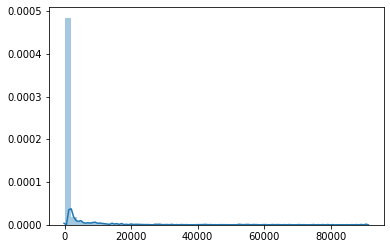

In [40]:
#shape = all_ult_mask_coverage_150_str1_list.squeeze()
sns.distplot( all_ult_mask_coverage_ndwi_ice_st_025_list.squeeze() )
print(np.sum(all_ult_mask_coverage_ndwi_ice_st_025_list))
print(np.average(all_ult_mask_coverage_ndwi_ice_st_025_list.squeeze()))
print(np.median(all_ult_mask_coverage_ndwi_ice_st_025_list.squeeze()))

### all_ult_mask_coverage_ndwi_st_025_list

In [141]:
np.average(all_ult_mask_coverage_ndwi_st_025_list.squeeze())

1963.8923144360024

In [44]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_ndwi_st_025_list.squeeze():
    if i < 20:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

3375
3469


In [45]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_ndwi_st_025_list.squeeze():
    if i < 15:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

3307
3537


In [46]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_ndwi_st_025_list.squeeze():
    if i < 10:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

3232
3612


In [47]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_ndwi_st_025_list.squeeze():
    if i < 5:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

3106
3738


In [51]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_ndwi_st_025_list.squeeze():
    if i != 0:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

3966
2878


In [43]:
counter = 0
counter_bad = 0
for i in all_ult_mask_coverage_ndwi_ice_st_025_list.squeeze():
    if i < 25:
        counter = counter + 1
    else:
        counter_bad = counter_bad + 1
        
print(counter)
print(counter_bad)

3784
3060
